<a href="https://colab.research.google.com/github/juliet29/es159_final/blob/master/extractPaths_orig.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
import pandas as pd


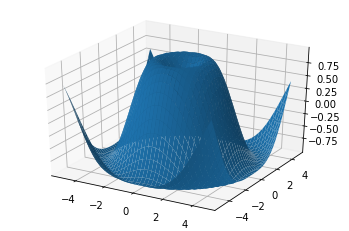

In [365]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# # Plot the surface.
surf = ax.plot_surface(X, Y, Z)

plt.show()

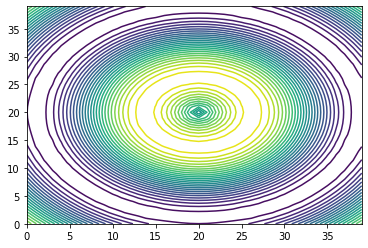

In [428]:
C = plt.contour(Z, 30)

In [433]:
raw_zs = C.levels
print(C.levels)
raw_df= pd.DataFrame(C.allsegs)
display(raw_df.head(5))

[-1.04 -0.96 -0.88 -0.8  -0.72 -0.64 -0.56 -0.48 -0.4  -0.32 -0.24 -0.16
 -0.08  0.    0.08  0.16  0.24  0.32  0.4   0.48  0.56  0.64  0.72  0.8
  0.88  0.96  1.04]


,0,1,2,3,4,5
0,None,None,None,None,None,None
1,"[[39.00000000000001, 13.834117789869097], [38....","[[26.165882210130906, 39.00000000000001], [27....","[[16.0, 2.6419742205997068], [17.0, 2.43264847...",None,None,None
2,"[[14.203634432332453, 0.0], [14.0, 0.068324266...","[[39.0, 11.500128354958035], [38.7426460154503...","[[0.0, 25.796365567667547], [0.068324266951324...","[[28.499871645041964, 39.0], [29.0, 38.7426460...","[[15.0, 3.8609034414181793], [16.0, 3.55474187...",None
3,"[[12.346942096190126, 0.0], [12.0, 0.146739301...","[[39.0, 10.11356915134631], [38.93712350878437...","[[0.0, 27.653057903809874], [0.146739301403132...","[[29.88643084865369, 39.0], [30.0, 38.93712350...","[[18.0, 3.8226087017217645], [19.0, 3.72045611...",None
4,"[[11.0381771261032, 0.0], [11.0, 0.01781655716...","[[39.0, 9.081276896700276], [38.95153810489727...","[[0.0, 28.9618228738968], [0.01781655716304583...","[[30.918723103299723, 39.0], [31.0, 38.9515381...","[[16.0, 4.707109493427901], [17.0, 4.474527239...",None


In [430]:
# drop dataframe rows that are nan in the first column, and their corresponding zs
mask = raw_df[0].isna()
zs = raw_zs[~mask]
df = raw_df.dropna(subset=[0])

print(len(zs))
print(df.shape)

25
(25, 6)


In [431]:
nice_df = pd.DataFrame(columns=["x", "y", "z"])
for row_n in range(np.shape(df)[0]): 
  df_row = list(df.iloc[row_n].dropna().to_numpy())
  row_z = zs[row_n]
  
  for i in range(len(df_row)):
    row_dict = {}
    row_dict['x'] = [df_row[i][:,0]]
    row_dict['y'] = [df_row[i][:,1]]
    row_dict['z'] = row_z
    row_df = pd.DataFrame(row_dict)
    nice_df = nice_df.append(row_df, ignore_index=True)

display(nice_df.head(7))

,x,y,z
0,"[39.00000000000001, 38.618504935171025, 38.239...","[13.834117789869097, 12.999999999999998, 12.0,...",-0.96
1,"[26.165882210130906, 27.0, 28.0, 28.6291478088...","[39.00000000000001, 38.618504935171025, 38.239...",-0.96
2,"[16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23....","[2.6419742205997068, 2.4326484724734883, 2.305...",-0.96
3,"[14.203634432332453, 14.0, 13.0, 12.0, 11.5001...","[0.0, 0.06832426695132492, 0.4377379319515105,...",-0.88
4,"[39.0, 38.742646015450305, 38.234437232656845,...","[11.500128354958035, 11.000000000000002, 10.0,...",-0.88
5,"[0.0, 0.06832426695132492, 0.4377379319515105,...","[25.796365567667547, 26.0, 27.0, 28.0, 28.4998...",-0.88
6,"[28.499871645041964, 29.0, 30.0, 30.4436414110...","[39.0, 38.742646015450305, 38.234437232656845,...",-0.88


In [0]:
def plot_dif_contour(df, z_val):
  z_bool = df['z'] == z_val
  dz = df[z_bool].reset_index(drop=True)
  for i in range(dz.shape[0]):
    ax.plot(dz['x'][i],dz['y'][i], dz['z'][i] )


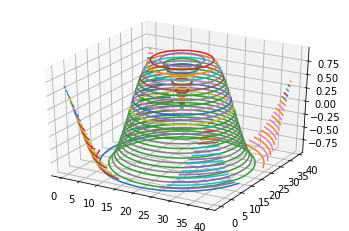

In [432]:
fig = plt.figure()
ax = fig.gca(projection='3d')

for i in zs:
  plot_dif_contour(nice_df, i)

plt.show()


## Old Tins

In [0]:
df_row1 = list(df.iloc[1].dropna().to_numpy())
z1 = zs[1]
x1 = np.concatenate([df_row1[i][:,0] for i in range(len(df_row1))])
y1 = np.concatenate([df_row1[i][:,1] for i in range(len(df_row1))])

In [0]:
df_row2 = list(df.iloc[2].dropna().to_numpy())
z2 = zs[2]
x2 = np.concatenate([df_row2[i][:,0] for i in range(len(df_row2))])
y2 = np.concatenate([df_row2[i][:,1] for i in range(len(df_row2))])

No handles with labels found to put in legend.


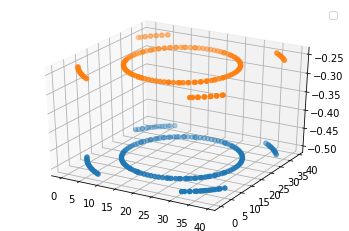

In [373]:
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.scatter(x1, y1, z1)
ax.scatter(x2, y2, z2)
ax.legend()

plt.show()

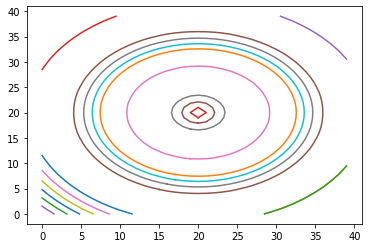

In [374]:
plt.plot(df[0][1][:,0],df[0][1][:,1])
plt.plot(df[1][1][:,0],df[1][1][:,1])
plt.plot(df[1][1][:,0],df[1][1][:,1])
plt.plot(df[2][1][:,0],df[2][1][:,1])
plt.plot(df[3][1][:,0],df[3][1][:,1])
plt.plot(df[4][1][:,0],df[4][1][:,1])

plt.plot(df[0][2][:,0],df[0][2][:,1])
plt.plot(df[4][2][:,0],df[4][2][:,1])

plt.plot(df[0][3][:,0],df[0][3][:,1])
plt.plot(df[4][3][:,0],df[4][3][:,1])

plt.plot(df[0][4][:,0],df[0][4][:,1])
plt.plot(df[4][4][:,0],df[4][4][:,1])

plt.plot(df[0][5][:,0],df[0][5][:,1])
plt.plot(df[5][5][:,0],df[5][5][:,1])

plt.plot(df[0][6][:,0],df[0][6][:,1])
plt.plot(df[4][6][:,0],df[4][6][:,1])

plt.plot(df[0][7][:,0],df[0][7][:,1])
plt.plot(df[1][7][:,0],df[1][7][:,1])

In [0]:
# this is how to concatenate flat numpy arrays of (n, 1)
#np.concatenate([df_row2[i][:,0] for i in range(len(df_row2))])
